Importing the libraries that we need in order to create the sweetviz report.

In [12]:
import pandas as pd
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


We need to load the data to a panda DataFrame

In [5]:
train_df = pd.read_csv('data/train_heart.csv')


We needed to generate, save and show the report in order to view the final report. 

In [6]:
# Generate the EDA report
report = sv.analyze(train_df)
report.show_html("sweetviz_report.html")

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Before we create the correlation matrix, we neededto identify columns with non-numeric data 

In [11]:
non_numeric_columns = train_df.select_dtypes(exclude=['int64', 'float64']).columns
print("Non-numeric columns:", non_numeric_columns)


for column in non_numeric_columns:
    print(f"Unique values in column '{column}':", train_df[column].unique())

Non-numeric columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')
Unique values in column 'Sex': ['M' 'F']
Unique values in column 'ChestPainType': ['ASY' 'ATA' 'NAP' 'TA']
Unique values in column 'RestingECG': ['ST' 'LVH' 'Normal']
Unique values in column 'ExerciseAngina': ['Y' 'N']
Unique values in column 'ST_Slope': ['Flat' 'Down' 'Up']


Below we are converting categorical variable to numerical formats

In [13]:
label_encoder = LabelEncoder()

train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
train_df['ChestPainType'] = label_encoder.fit_transform(train_df['ChestPainType'])
train_df['RestingECG'] = label_encoder.fit_transform(train_df['RestingECG'])
train_df['ExerciseAngina'] = label_encoder.fit_transform(train_df['ExerciseAngina'])
train_df['ST_Slope'] = label_encoder.fit_transform(train_df['ST_Slope'])

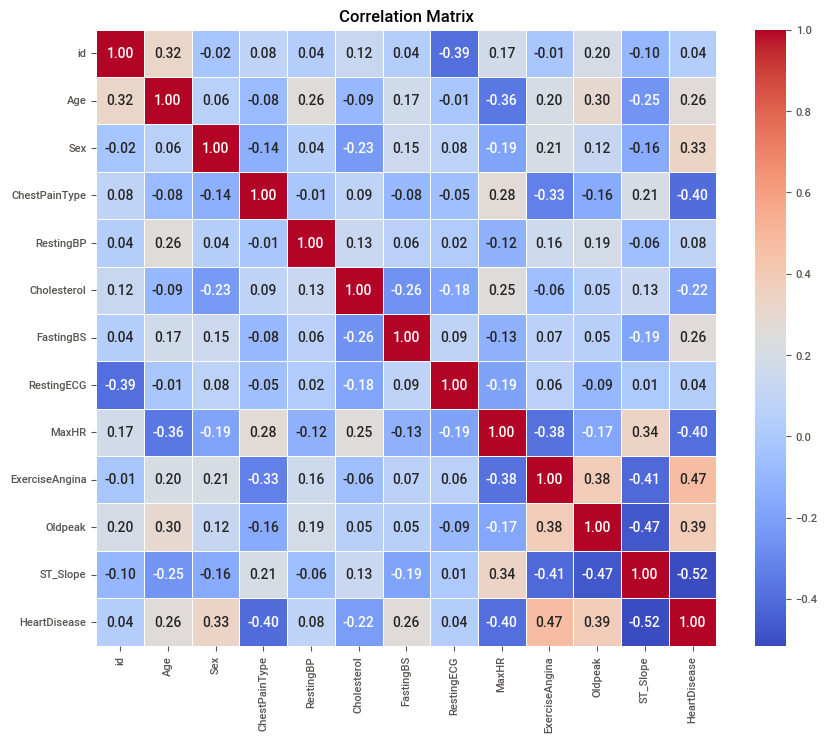

In [15]:
# Calculate correlation matrix
correlation_matrix = train_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()